<a href="https://colab.research.google.com/github/christiangarza1505813/PCD/blob/main/clasificador_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install librosa pywavelets tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 19.9 MB/s eta 0:00:00


In [7]:
import kagglehub, os
# Download latest version
path = kagglehub.dataset_download("mmoreaux/audio-cats-and-dogs")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mmoreaux/audio-cats-and-dogs/versions/5


In [8]:
source_dir = path + '/cats_dogs'

In [9]:
os.listdir(source_dir+'/test/test/')

['dog_barking_15.wav',
 'dog_barking_73.wav',
 'dog_barking_8.wav',
 'dog_barking_3.wav',
 'dog_barking_48.wav',
 'dog_barking_91.wav',
 'dog_barking_99.wav',
 'dog_barking_78.wav',
 'dog_barking_9.wav',
 'dog_barking_89.wav',
 'dog_barking_44.wav',
 'dog_barking_43.wav',
 'dog_barking_54.wav',
 'dog_barking_66.wav',
 'dog_barking_46.wav',
 'dog_barking_49.wav',
 'dog_barking_90.wav',
 'dog_barking_12.wav',
 'dog_barking_112.wav',
 'dog_barking_62.wav',
 'dog_barking_7.wav',
 'dog_barking_19.wav',
 'dog_barking_82.wav',
 'dog_barking_34.wav',
 'dog_barking_59.wav',
 'dog_barking_64.wav',
 'dog_barking_45.wav',
 'dog_barking_24.wav']

In [10]:
import librosa
import pywt
import numpy as np
import os
from sklearn.model_selection import train_test_split

def extract_wavelet_features(file_path):
    # Cargar el archivo de audio
    y, sr = librosa.load(file_path, sr=None)
    # Aplicar la Transformada Wavelet
    coeffs = pywt.wavedec(y, 'db1', level=5)
    features = np.hstack(coeffs)

    return features

# Directorios de los archivos de audio
dog_dir = source_dir+'/train/dog'
cat_dir = source_dir+'/train/cat'

# Listas para almacenar las características y etiquetas
X = []
y = []

# Procesar archivos de perros
for file_name in os.listdir(dog_dir):
    if file_name.endswith('.wav'):
        file_path = os.path.join(dog_dir, file_name)
        features = extract_wavelet_features(file_path)
        X.append(features)
        y.append(0)  # Etiqueta 0 para perros

# Procesar archivos de gatos
for file_name in os.listdir(cat_dir):
    if file_name.endswith('.wav'):
        file_path = os.path.join(cat_dir, file_name)
        features = extract_wavelet_features(file_path)
        X.append(features)
        y.append(1)  # Etiqueta 1 para gatos


from tensorflow.keras.preprocessing.sequence import pad_sequences
X = pad_sequences(X, dtype='float32', padding='post')


# Convertir a arrays de numpy
X = np.array(X)
y = np.array(y)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Definir el modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │      36,225,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,233,473 (138.22 MB)

 Trainable params: 36,233,473 (138.22 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 704ms/step - accuracy: 0.9864 - loss: 0.1106 - val_accuracy: 0.5238 - val_loss: 0.7358
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 832ms/step - accuracy: 0.9762 - loss: 0.0802 - val_accuracy: 0.5238 - val_loss: 0.7482
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 690ms/step - accuracy: 0.9911 - loss: 0.1119 - val_accuracy: 0.5238 - val_loss: 0.7587
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 686ms/step - accuracy: 0.9807 - loss: 0.2495 - val_accuracy: 0.5238 - val_loss: 0.7659
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 911ms/step - accuracy: 0.9948 - loss: 0.0178 - val_accuracy: 0.5238 - val_loss: 0.7676
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 676ms/step - accuracy: 0.9900 - loss: 0.0179 - val_accuracy: 0.5238 - val_loss: 0.7695
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 818ms/step - accuracy: 0.9911 - loss: 0.0296 - val_accuracy: 0.5238 - val_loss: 0.7715
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 686ms/step - accuracy: 0.9926 - loss: 0.0250 - val_accuracy: 0.5238 - val_loss:

In [14]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5685 - loss: 0.7797 
Loss: 0.7651879191398621, Accuracy: 0.5714285969734192


In [15]:
def predict_sound(file_path):
    features = extract_wavelet_features(file_path)
    # Reshape to a 2D array with a single sample
    features = features.reshape(1, -1)

    # Pad the features to match the input shape of the model
    features = pad_sequences(features, maxlen=X_train.shape[1], dtype='float32', padding='post')

    prediction = model.predict(features)
    if prediction > 0.5:
        return 'Gato'
    else:
        return 'Perro'

# Ejemplo de inferencia
new_file_path = source_dir+'/test/test/dog_barking_8.wav'
result = predict_sound(new_file_path)
print(f'El sonido es de un: {result}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
El sonido es de un: Perro


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


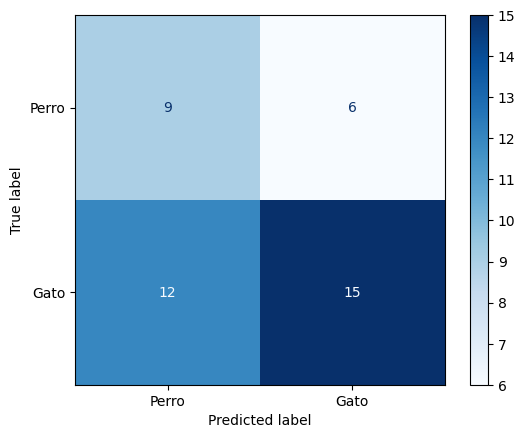

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

# Si el modelo usa activación sigmoide (para clasificación binaria), convertir a 0 o 1
y_pred = (y_pred > 0.5).astype(int)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Perro", "Gato"])
disp.plot(cmap=plt.cm.Blues)
plt.show()